In [67]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import label_binarize
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.utils import shuffle

In [40]:
TRAIN_DIR = '..\\dataset\\brain-tumor-mri-dataset\\Training'
TEST_DIR = '..\\dataset\\brain-tumor-mri-dataset\\Testing'
IMAGE_SIZE = 224

In [41]:
def load_image_paths_and_labels(data_dir, random_state = 42):
    """
    Load image file paths and corresponding class labels from a directory.

    The directory structure is expected to be:
        data_dir/
            class_1/
                img1.jpg
                img2.jpg
            class_2/
                img3.jpg
                img4.jpg
            ...

    Args:
        data_dir (str): Root directory containing class-wise subdirectories.

    Returns:
        tuple:
            - paths (list): List of full image file paths.
            - labels (list): List of corresponding class labels.
    """

    paths = []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)

        if not os.path.isdir(label_dir):
            continue

        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            paths.append(image_path)
            labels.append(label)

    paths, labels = shuffle(paths, labels, random_state= random_state)

    return (paths, labels)


In [42]:
train_paths, train_labels = load_image_paths_and_labels(TRAIN_DIR)


In [43]:
print(f"Training Paths: {train_paths}")
print(f"Training Lables: {set(train_labels)}")
print(f"Training Dataset Size: {len(train_paths)}")


Training Paths: ['..\\dataset\\brain-tumor-mri-dataset\\Training\\meningioma\\Tr-me_0379.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\notumor\\Tr-no_0609.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\glioma\\Tr-gl_0561.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\pituitary\\Tr-pi_1210.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\pituitary\\Tr-pi_1205.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\notumor\\Tr-no_0415.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\pituitary\\Tr-pi_1448.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\notumor\\Tr-no_1196.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\glioma\\Tr-gl_0373.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\glioma\\Tr-gl_0410.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\glioma\\Tr-gl_0080.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\notumor\\Tr-no_1431.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Training\\meningioma\\Tr-me_0888.jpg', 

In [44]:
test_paths, test_labels = load_image_paths_and_labels(TEST_DIR)


In [45]:
print(f"Testing Paths: {test_paths}")
print(f"Testing Lables: {set(test_labels)}")
print(f"Testing Dataset Size: {len(test_paths)}")


Testing Paths: ['..\\dataset\\brain-tumor-mri-dataset\\Testing\\pituitary\\Te-pi_0109.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\pituitary\\Te-pi_0061.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\glioma\\Te-gl_0198.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\meningioma\\Te-me_0275.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\meningioma\\Te-me_0031.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\notumor\\Te-no_0172.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\glioma\\Te-gl_0175.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\pituitary\\Te-pi_0165.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\notumor\\Te-no_0135.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\meningioma\\Te-me_0046.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\glioma\\Te-gl_0270.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\meningioma\\Te-me_0243.jpg', '..\\dataset\\brain-tumor-mri-dataset\\Testing\\pituitary\\Te-pi_0183.jpg', '..\\

In [46]:
def visualize_dataset(
    image_paths,
    image_labels,
    title="Dataset Visualization",
    num_samples=10,
    rows=2,
    cols=5,
    img_size=(224, 224)
):
    """
    Visualize random samples from an image dataset with class-wise color labels.

    Args:
        image_paths (list): List of image file paths.
        image_labels (list): Corresponding class labels for each image.
        title (str): Title of the visualization.
        num_samples (int): Number of images to display.
        rows (int): Number of subplot rows.
        cols (int): Number of subplot columns.
        img_size (tuple): Image resize dimensions as (width, height).

    Returns:
        None
    """

    random_indices = random.sample(range(len(image_paths)), num_samples)

    fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
    fig.suptitle(title, fontsize=18, fontweight="bold")

    plt.subplots_adjust(
        left=0.05,
        right=0.95,
        top=0.88,
        bottom=0.05,
        wspace=0.05,
        hspace=0.05
    )

    axes = axes.ravel()

    for i, idx in enumerate(random_indices):
        img_path = image_paths[idx]

        img = Image.open(img_path).convert("RGB")
        img = img.resize(img_size)

        axes[i].imshow(img)
        axes[i].axis("off")

        label = image_labels[idx]
        label_text = f"Class: {label}"

        if label == "notumor":
            bg_color = "#009E60" # green
        else:
            bg_color = "#CC0000" # red

        axes[i].text(
            8, 16,
            label_text,
            fontsize=11,
            color="white",
            bbox=dict(
                facecolor=bg_color,
                alpha=0.85,
                pad=4
            )
        )

    plt.show()


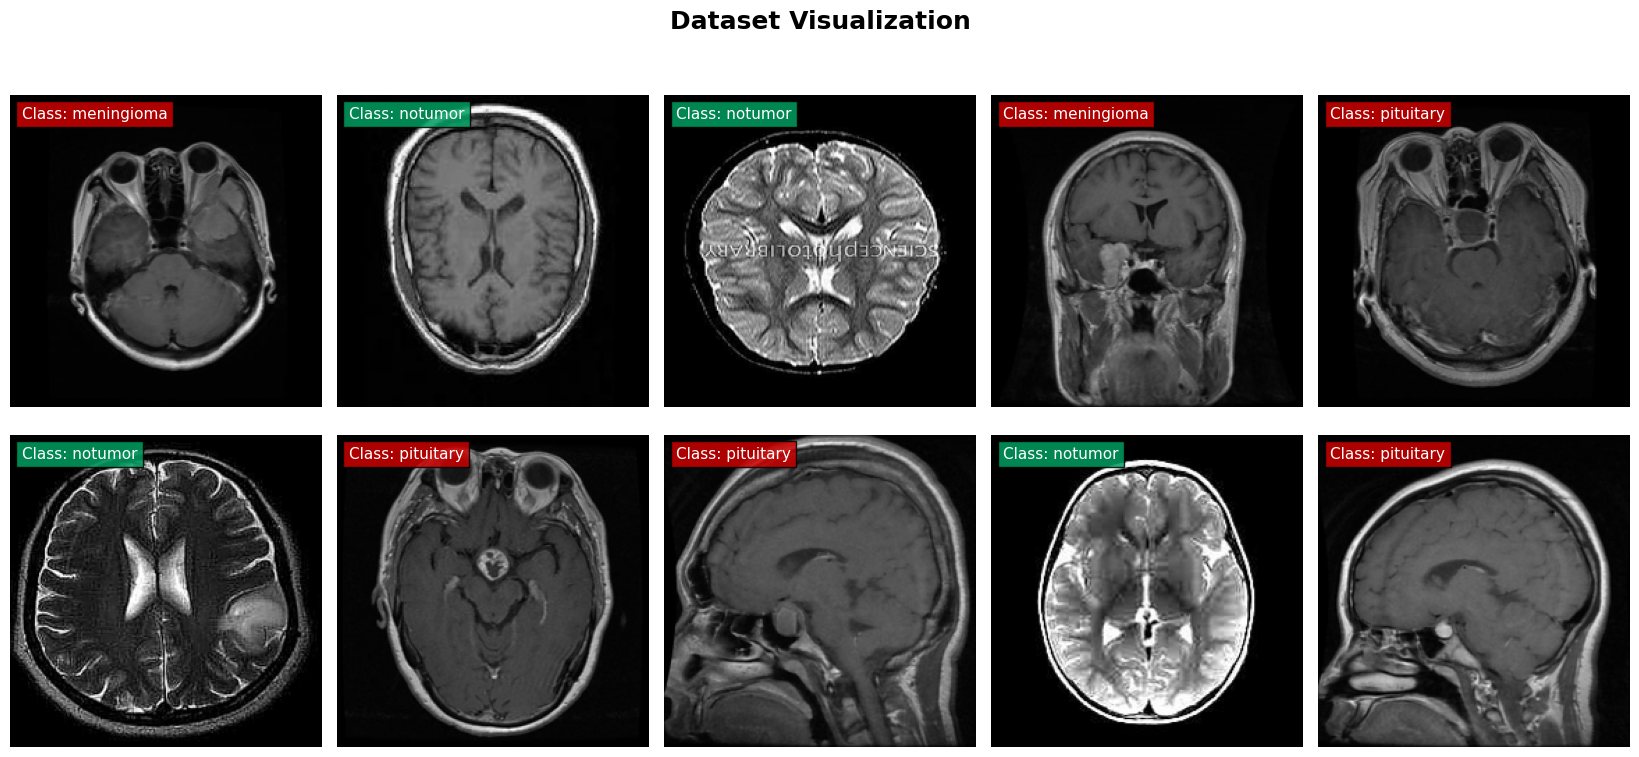

In [47]:
visualize_dataset(train_paths, train_labels)


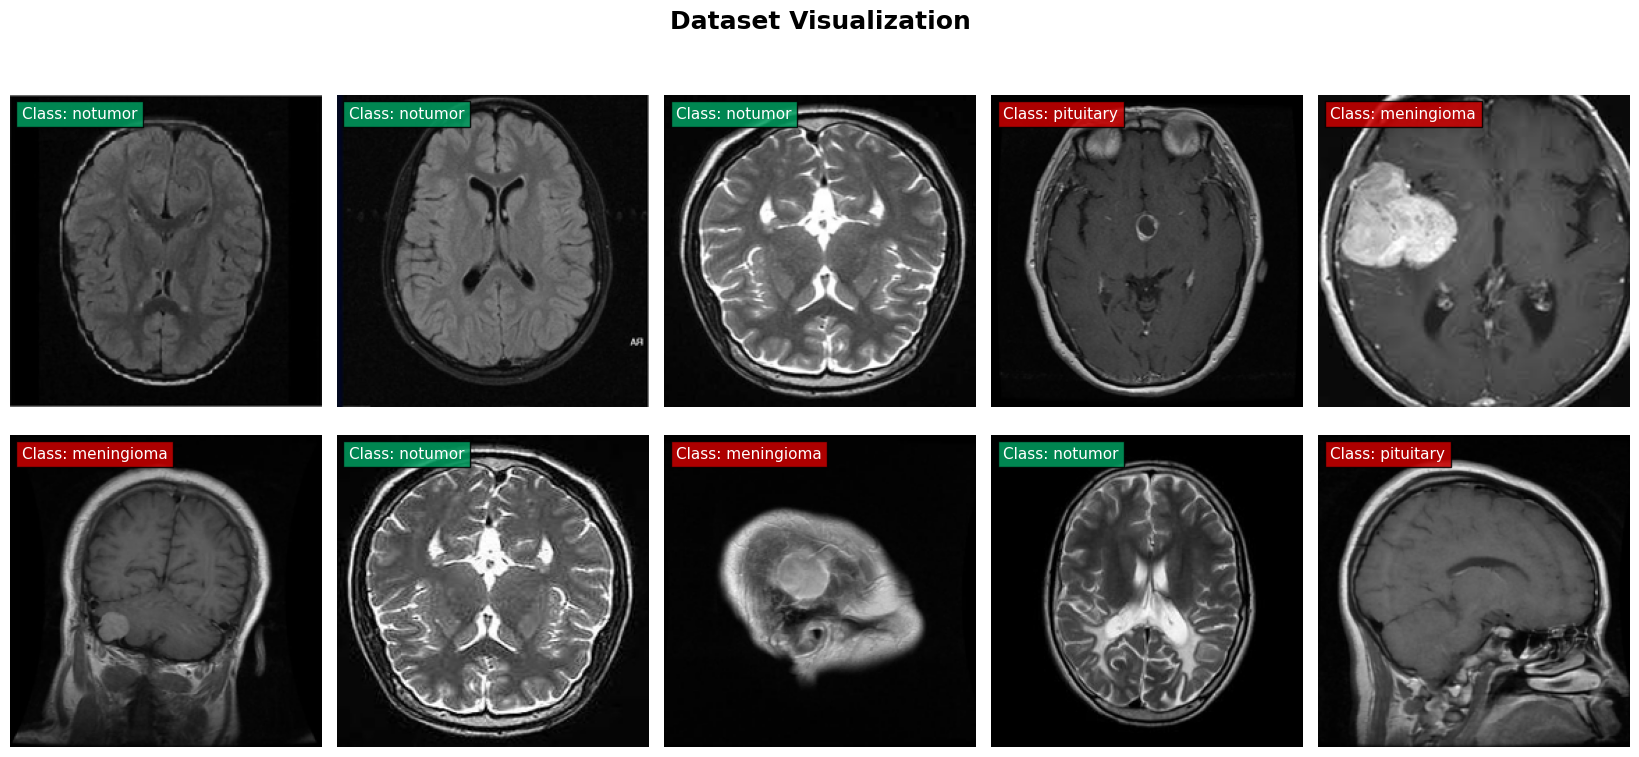

In [48]:
visualize_dataset(test_paths, test_labels)


In [49]:
def augment_image(image):
    """
    Apply random data augmentation to a single image.

    The function performs stochastic image augmentations including:
    - Small random rotation
    - Random brightness adjustment
    - Random contrast adjustment

    The image is normalized to the range [0, 1] and reshaped to maintain
    a single-channel (grayscale) format suitable for CNN input.

    Args:
        image (numpy.ndarray): Input image array with shape
            (H, W, 1) or (H, W). Pixel values are expected in the
            range [0, 255].

    Returns:
        numpy.ndarray: Augmented image with shape (H, W, 1) and
        pixel values normalized to the range [0, 1].
    """
    
    image = image.squeeze()

    image = Image.fromarray(np.uint8(image))

    if random.random() < 0.3:
        image = image.rotate(random.uniform(-7, 7))

    if random.random() < 0.4:
        image = ImageEnhance.Brightness(image).enhance(random.uniform(0.9, 1.1))

    if random.random() < 0.4:
        image = ImageEnhance.Contrast(image).enhance(random.uniform(0.9, 1.1))

    image = np.array(image).astype("float32")

    image = image / 255.0

    image = np.expand_dims(image, axis=-1)

    return image


In [50]:
def open_images(paths):
    """
    Load, preprocess, and augment images from a list of file paths.

    This function performs the following steps for each image:
    - Loads the image in grayscale mode and resizes it to a fixed size
    - Converts the image to a NumPy array
    - Ensures the image has an explicit channel dimension
    - Applies random data augmentation
    - Replicates the single channel to form a 3-channel image
      (required for CNN models expecting RGB input)
    - Converts the image to float32 format

    Args:
        paths (list): List of image file paths.

    Returns:
        numpy.ndarray: Array of processed images with shape
        (N, IMAGE_SIZE, IMAGE_SIZE, 3), where N is the number of images.
        Pixel values are normalized to the range [0, 1].
    """

    images = []
    for path in paths:
        image = load_img(
            path,
            target_size=(IMAGE_SIZE, IMAGE_SIZE),
            color_mode="grayscale"
        )

        image = np.array(image)

        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)

        image = augment_image(image)

        image = np.repeat(image, 3, axis=-1)

        images.append(image.astype("float32"))

    return np.array(images)


In [51]:
def encode_label(labels):
    """
    Encode string class labels into integer indices.

    This function maps each class label to a numeric value based on the
    sorted list of class directories present in the training dataset.
    The encoding is consistent across the dataset and suitable for use
    with classification loss functions such as sparse categorical
    cross-entropy.

    Args:
        labels (list): List of class labels as strings.

    Returns:
        numpy.ndarray: Array of integer-encoded labels corresponding
        to the input class labels.
    """

    unique_labels = sorted(os.listdir(TRAIN_DIR))
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)


In [52]:
def datagen(paths, labels, batch_size=12, epochs=1):
    """
    Generator function that yields batches of augmented images and encoded labels.

    This function shuffles the dataset at the beginning of each epoch and
    generates batches of images and labels for training or evaluation.
    Images are loaded, preprocessed, augmented, and labels are integer-encoded
    before being yielded.

    Args:
        paths (list): List of image file paths.
        labels (list): Corresponding class labels as strings.
        batch_size (int, optional): Number of samples per batch.
            Defaults to 12.
        epochs (int, optional): Number of times to iterate over the dataset.
            Defaults to 1.

    Yields:
        tuple:
            - numpy.ndarray: Batch of images with shape
              (batch_size, IMAGE_SIZE, IMAGE_SIZE, 3).
            - numpy.ndarray: Batch of integer-encoded labels with shape
              (batch_size,).
    """

    for _ in range(epochs):
        combined = list(zip(paths, labels))
        random.shuffle(combined)
        paths, labels = zip(*combined)

        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)

            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)

            yield batch_images, batch_labels


In [53]:
x, y = next(datagen(train_paths, train_labels, batch_size=2))
print(x.shape)

(2, 224, 224, 3)


In [54]:
base_model = VGG16(
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers:
    if "block5" in layer.name:
        layer.trainable = True


In [55]:
model = Sequential()

model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(
    len(os.listdir(TRAIN_DIR)),
    activation="softmax"
))


In [56]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)


In [57]:
batch_size = 16
epochs = 5

steps_per_epoch = len(train_paths) // batch_size

history = model.fit(
    datagen(
        train_paths,
        train_labels,
        batch_size=batch_size,
        epochs=epochs
    ),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)


Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - loss: 0.4829 - sparse_categorical_accuracy: 0.8193
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - loss: 0.2206 - sparse_categorical_accuracy: 0.9207
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - loss: 0.1463 - sparse_categorical_accuracy: 0.9477
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 428s 1s/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9702
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 902s 3s/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9785


In [58]:
model.save('model.h5')

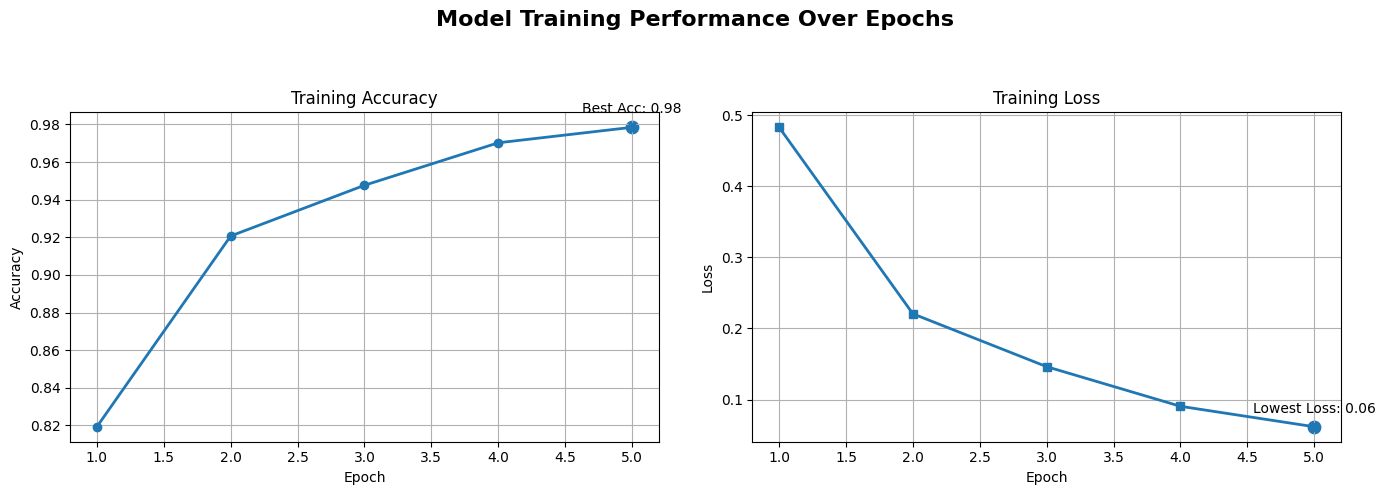

In [59]:
epochs_range = range(1, epochs + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Model Training Performance Over Epochs", fontsize=16, fontweight="bold")

axes[0].plot(
    epochs_range,
    history.history['sparse_categorical_accuracy'],
    marker='o',
    linestyle='-',
    linewidth=2
)
axes[0].set_title("Training Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)

best_acc_epoch = np.argmax(history.history['sparse_categorical_accuracy']) + 1
best_acc = max(history.history['sparse_categorical_accuracy'])
axes[0].scatter(best_acc_epoch, best_acc, s=80)
axes[0].annotate(
    f"Best Acc: {best_acc:.2f}",
    (best_acc_epoch, best_acc),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center"
)

axes[1].plot(
    epochs_range,
    history.history['loss'],
    marker='s',
    linestyle='-',
    linewidth=2
)
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].grid(True)

best_loss_epoch = np.argmin(history.history['loss']) + 1
best_loss = min(history.history['loss'])
axes[1].scatter(best_loss_epoch, best_loss, s=80)
axes[1].annotate(
    f"Lowest Loss: {best_loss:.2f}",
    (best_loss_epoch, best_loss),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center"
)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [ ]:
test_images = open_images(test_paths)
test_labels_encoded = encode_label(test_labels)

predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

class_names = sorted(os.listdir(TRAIN_DIR))


41/41 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


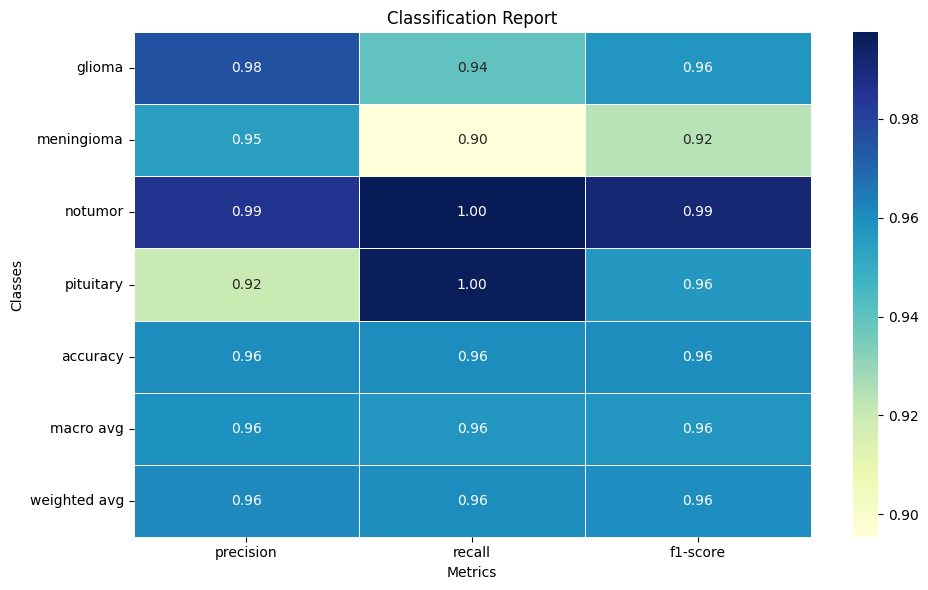

In [ ]:
report = classification_report(
    test_labels_encoded,
    y_pred,
    target_names=class_names,
    output_dict=True
)

report_df = pd.DataFrame(report).transpose()
report_df = report_df[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(10, 6))
sns.heatmap(
    report_df,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Classification Report")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()


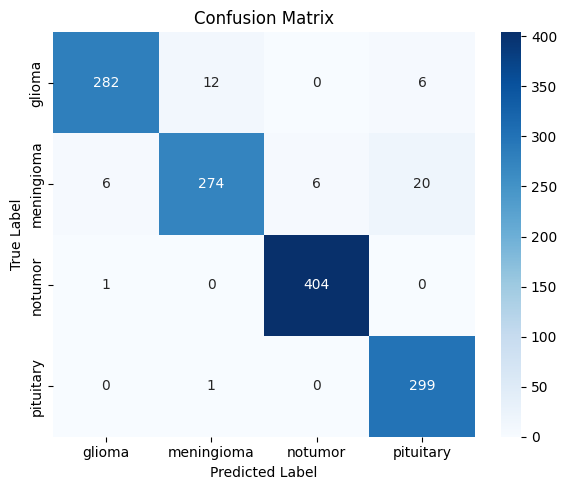

In [ ]:
cm = confusion_matrix(test_labels_encoded, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


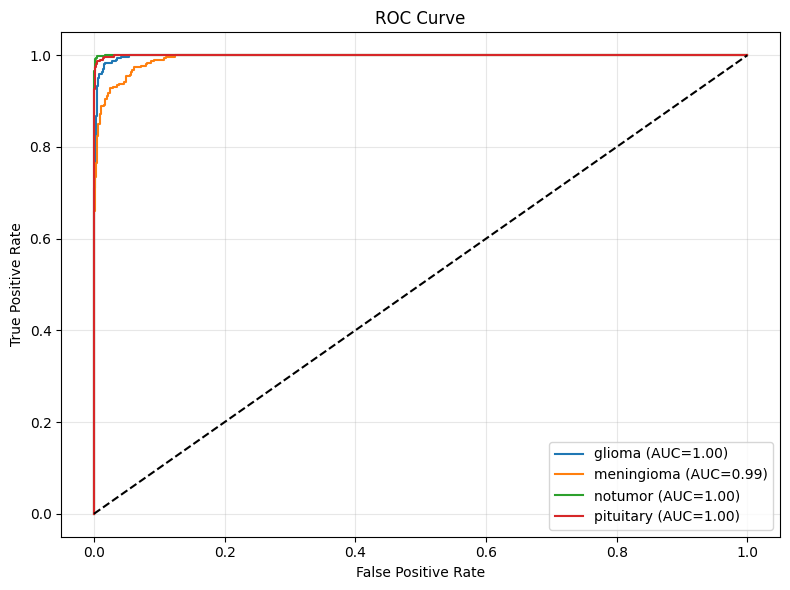

In [ ]:
num_classes = predictions.shape[1]
y_test_bin = label_binarize(test_labels_encoded, classes=range(num_classes))

plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


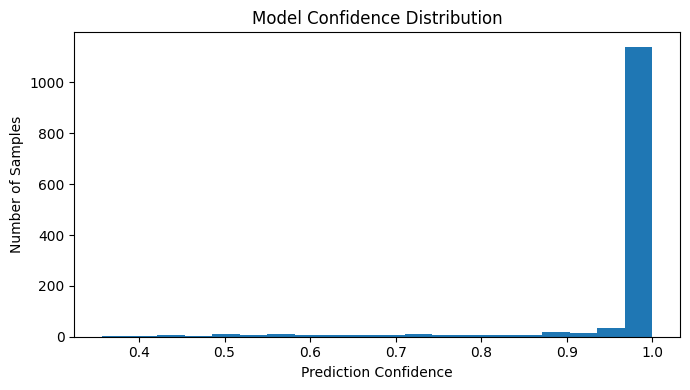

In [ ]:
confidence = np.max(predictions, axis=1)

plt.figure(figsize=(7, 4))
plt.hist(confidence, bins=20)
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Samples")
plt.title("Model Confidence Distribution")
plt.tight_layout()
plt.show()


In [68]:
def detect_and_display(img_path, model):
    """
    Perform brain tumor detection on a single MRI image and display the result.

    This function loads an MRI image from the given file path, preprocesses it
    using the same pipeline applied during model training (grayscale conversion,
    resizing, normalization, and channel expansion), and performs inference using
    a trained CNN model. The predicted tumor class and confidence score are then
    displayed along with the input image.

    If the predicted class is 'notumor', the result is shown as "No Tumor".
    Otherwise, the detected tumor type is displayed.

    Parameters
    ----------
    img_path : str
        File path to the input MRI image.

    model : tensorflow.keras.Model
        Trained CNN model used for tumor classification.

    Returns
    -------
    None
        This function does not return any value. It displays the input image
        along with the predicted class and confidence score.
    """

    try:
        img = load_img(
            img_path,
            target_size=(IMAGE_SIZE, IMAGE_SIZE),
            color_mode="grayscale"
        )

        img_array = np.array(img)

        if img_array.ndim == 2:
            img_array = np.expand_dims(img_array, axis=-1) 

        img_array = img_array / 255.0 
        img_array = np.repeat(img_array, 3, axis=-1) 
        img_array = np.expand_dims(img_array, axis=0) 

        predictions = model.predict(img_array)
        predicted_index = np.argmax(predictions[0])
        confidence = predictions[0][predicted_index]

        class_labels = sorted(os.listdir(TRAIN_DIR))

        if class_labels[predicted_index] == "notumor":
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_index]}"

        plt.figure(figsize=(4, 4))
        plt.imshow(load_img(img_path))
        plt.axis("off")
        plt.title(f"{result}\nConfidence: {confidence * 100:.2f}%")
        plt.show()

    except Exception as e:
        print("Error processing the image:", e)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


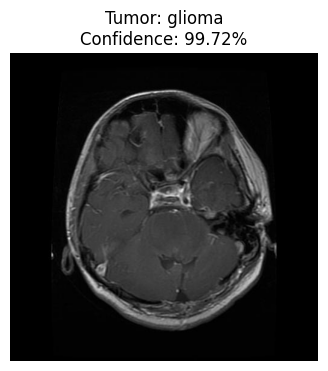

In [73]:
detect_and_display(img_path= r"..\dataset\brain-tumor-mri-dataset\Testing\glioma\Te-gl_0010.jpg",model=model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


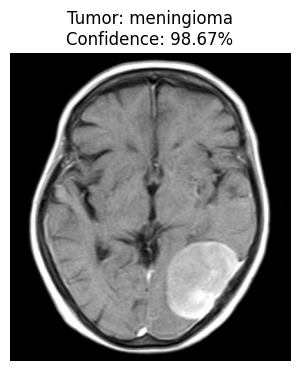

In [72]:
detect_and_display(img_path= r"..\dataset\brain-tumor-mri-dataset\Testing\meningioma\Te-me_0017.jpg",model=model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


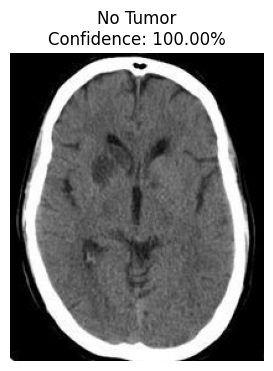

In [74]:
detect_and_display(img_path= r"..\dataset\brain-tumor-mri-dataset\Testing\notumor\Te-no_0010.jpg",model=model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


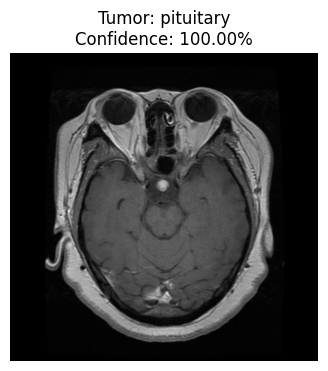

In [75]:
detect_and_display(img_path= r"..\dataset\brain-tumor-mri-dataset\Testing\pituitary\Te-pi_0010.jpg",model=model)
